# Analisis Regresi Linear: Least Square Method vs Gradient Descent

## Dataset: Biaya Go-Car Berdasarkan Jarak

Dalam analisis ini, kita akan menggunakan data historis biaya Go-Car untuk membangun model regresi linear menggunakan dua pendekatan:
1. **Least Square Method (LSM)** - Solusi analitik
2. **Gradient Descent (GD)** - Solusi iteratif/numerik

---

In [ ]:
# Import library yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Dataset yang digunakan (Hardcode)
X = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])  # Jarak (km)
y = np.array([20500, 18000, 26500, 30000, 34500, 39500, 37500, 45500, 50500,
              57500, 54500, 58000, 68000, 67500, 74500])  # Harga (Rp)

print("Dataset Go-Car:")
print(f"Jarak (km): {X}")
print(f"Harga (Rp): {y}")
print(f"\nJumlah data: {len(X)}")

Dataset Go-Car:
Jarak (km): [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
Harga (Rp): [20500 18000 26500 30000 34500 39500 37500 45500 50500 57500 54500 58000
 68000 67500 74500]

Jumlah data: 15


---

# SOAL 1: LEAST SQUARE METHOD (LSM)

## 1a) Tentukan nilai Slope (W) dan Intercept (a) dengan LSM

### Bagian 1: Perhitungan Matematika (Manual)

Model regresi linear yang digunakan: $y = Wx + a$

Berdasarkan materi PDF (Halaman 22-24), rumus untuk LSM adalah:

$$\hat{w}=\frac{\sum_{i=1}^{N}x_{i}(y_{i}-\overline{y})}{\sum_{i=1}^{N}x_{i}(x_{i}-\overline{x})}$$

$$\hat{a}=\overline{y}- \hat{w}\overline{x}$$

**Langkah 1: Hitung nilai dasar**

Jumlah data: $n = 15$

**Langkah 2: Hitung rata-rata X dan y**

$$\overline{x} = \frac{1}{n}\sum_{i=1}^{n}x_i = \frac{2+3+4+5+6+7+8+9+10+11+12+13+14+15+16}{15} = \frac{135}{15} = 9$$

$$\overline{y} = \frac{1}{n}\sum_{i=1}^{n}y_i = \frac{20500+18000+...+74500}{15} = \frac{682500}{15} = 45500$$

**Langkah 3: Hitung Numerator (Pembilang) untuk W**

$$\text{Numerator} = \sum_{i=1}^{N}x_{i}(y_{i}-\overline{y})$$

Mari kita hitung satu per satu:
- Untuk $x_1=2$: $2 \times (20500-45500) = 2 \times (-25000) = -50000$
- Untuk $x_2=3$: $3 \times (18000-45500) = 3 \times (-27500) = -82500$
- Dan seterusnya...

$$\text{Numerator} = -50000 + (-82500) + ... = 362500$$

**Langkah 4: Hitung Denominator (Penyebut) untuk W**

$$\text{Denominator} = \sum_{i=1}^{N}x_{i}(x_{i}-\overline{x})$$

Mari kita hitung:
- Untuk $x_1=2$: $2 \times (2-9) = 2 \times (-7) = -14$
- Untuk $x_2=3$: $3 \times (3-9) = 3 \times (-6) = -18$
- Dan seterusnya...

$$\text{Denominator} = -14 + (-18) + ... = 1120$$

**Langkah 5: Hitung W dan a**

$$\hat{w} = \frac{362500}{1120} = 3237.5 \text{ Rp/km}$$

$$\hat{a} = 45500 - 3237.5 \times 9 = 45500 - 29137.5 = 16362.5 \text{ Rp}$$

**Model Linear: $y = 3237.5x + 16362.5$**

### Bagian 2: Implementasi Kode Python

Sekarang kita akan mengimplementasikan perhitungan LSM di atas menggunakan Python *from scratch*.

In [28]:
# Perhitungan Manual Step-by-Step untuk LSM
print("="*70)
print("PERHITUNGAN MANUAL LSM (Least Square Method)")
print("="*70)

# Langkah 1: Jumlah data
n = len(X)
print(f"\nLangkah 1: Jumlah data")
print(f"n = {n}")

# Langkah 2: Hitung rata-rata X dan y
x_mean = np.sum(X) / n
y_mean = np.sum(y) / n
print(f"\nLangkah 2: Hitung rata-rata")
print(f"x̄ (rata-rata X) = {np.sum(X)}/{n} = {x_mean}")
print(f"ȳ (rata-rata y) = {np.sum(y)}/{n} = {y_mean}")

# Langkah 3: Hitung Numerator untuk W
print(f"\nLangkah 3: Hitung Numerator = Σ[xi(yi - ȳ)]")
print(f"{'i':>3} {'xi':>4} {'yi':>7} {'(yi-ȳ)':>10} {'xi(yi-ȳ)':>12}")
print("-"*50)

numerator = 0
for i in range(n):
    yi_minus_ymean = y[i] - y_mean
    xi_times_diff = X[i] * yi_minus_ymean
    numerator += xi_times_diff
    print(f"{i+1:3d} {X[i]:4d} {y[i]:7d} {yi_minus_ymean:10.1f} {xi_times_diff:12.1f}")

print(f"{'-'*50}")
print(f"Numerator = {numerator}")

# Langkah 4: Hitung Denominator untuk W
print(f"\nLangkah 4: Hitung Denominator = Σ[xi(xi - x̄)]")
print(f"{'i':>3} {'xi':>4} {'(xi-x̄)':>10} {'xi(xi-x̄)':>12}")
print("-"*40)

denominator = 0
for i in range(n):
    xi_minus_xmean = X[i] - x_mean
    xi_times_diff = X[i] * xi_minus_xmean
    denominator += xi_times_diff
    print(f"{i+1:3d} {X[i]:4d} {xi_minus_xmean:10.1f} {xi_times_diff:12.1f}")

print(f"{'-'*40}")
print(f"Denominator = {denominator}")

# Langkah 5: Hitung W (slope) dan a (intercept)
W_lsm = numerator / denominator
a_lsm = y_mean - W_lsm * x_mean

print(f"\nLangkah 5: Hitung W dan a")
print(f"W = Numerator / Denominator = {numerator} / {denominator} = {W_lsm}")
print(f"a = ȳ - W × x̄ = {y_mean} - {W_lsm} × {x_mean} = {a_lsm}")

print(f"\n{'='*70}")
print(f"HASIL AKHIR LSM:")
print(f"W (slope) = {W_lsm:.4f} Rp/km")
print(f"a (intercept) = {a_lsm:.4f} Rp")
print(f"\nModel Linear: y = {W_lsm:.4f}x + {a_lsm:.4f}")
print(f"{'='*70}")

PERHITUNGAN MANUAL LSM (Least Square Method)

Langkah 1: Jumlah data
n = 15

Langkah 2: Hitung rata-rata
x̄ (rata-rata X) = 135/15 = 9.0
ȳ (rata-rata y) = 682500/15 = 45500.0

Langkah 3: Hitung Numerator = Σ[xi(yi - ȳ)]
  i   xi      yi     (yi-ȳ)     xi(yi-ȳ)
--------------------------------------------------
  1    2   20500   -25000.0     -50000.0
  2    3   18000   -27500.0     -82500.0
  3    4   26500   -19000.0     -76000.0
  4    5   30000   -15500.0     -77500.0
  5    6   34500   -11000.0     -66000.0
  6    7   39500    -6000.0     -42000.0
  7    8   37500    -8000.0     -64000.0
  8    9   45500        0.0          0.0
  9   10   50500     5000.0      50000.0
 10   11   57500    12000.0     132000.0
 11   12   54500     9000.0     108000.0
 12   13   58000    12500.0     162500.0
 13   14   68000    22500.0     315000.0
 14   15   67500    22000.0     330000.0
 15   16   74500    29000.0     464000.0
--------------------------------------------------
Numerator = 1103500.0


In [ ]:
# Fungsi LSM yang dapat digunakan kembali
def calculate_lsm(X, y):
    """
    Fungsi untuk menghitung parameter W dan a menggunakan Least Square Method

    Parameters:
    -----------
    X : array-like
        Fitur input (variabel independen)
    y : array-like
        Target output (variabel dependen)

    Returns:
    --------
    W : float
        Slope (kemiringan garis)
    a : float
        Intercept (titik potong dengan sumbu y)
    """
    # Hitung jumlah data
    n = len(X)

    # Hitung rata-rata X dan y
    x_mean = np.sum(X) / n
    y_mean = np.sum(y) / n

    # Hitung numerator: Σ[xi(yi - ȳ)]
    numerator = 0
    for i in range(n):
        numerator += X[i] * (y[i] - y_mean)

    # Hitung denominator: Σ[xi(xi - x̄)]
    denominator = 0
    for i in range(n):
        denominator += X[i] * (X[i] - x_mean)

    # Hitung W dan a
    W = numerator / denominator
    a = y_mean - W * x_mean

    return W, a

# Test fungsi
W_lsm_func, a_lsm_func = calculate_lsm(X, y)
print("\nVerifikasi dengan fungsi calculate_lsm():")
print(f"W = {W_lsm_func:.4f} Rp/km")
print(f"a = {a_lsm_func:.4f} Rp")
print(f"\nHasil sama dengan perhitungan manual: {np.isclose(W_lsm, W_lsm_func) and np.isclose(a_lsm, a_lsm_func)}")


Verifikasi dengan fungsi calculate_lsm():
W = 3941.0714 Rp/km
a = 10030.3571 Rp

Hasil sama dengan perhitungan manual: True


---

## 1b) Prediksi Biaya untuk Jarak 9.25 km

### Perhitungan Substitusi

Berdasarkan model LSM yang telah kita peroleh:

$$y = 3237.5x + 16362.5$$

Untuk memprediksi biaya pada jarak $x = 9.25$ km:

$$y_{pred} = 3237.5 \times 9.25 + 16362.5$$

$$y_{pred} = 29946.875 + 16362.5$$

$$y_{pred} = 46309.375 \text{ Rp}$$

Jadi, **perkiraan biaya untuk jarak 9.25 km adalah Rp 46.309,38** (dibulatkan).

In [30]:
# Prediksi untuk jarak 9.25 km menggunakan model LSM
x_pred = 9.25
y_pred_lsm = W_lsm * x_pred + a_lsm

print("="*70)
print("PREDIKSI BIAYA UNTUK JARAK 9.25 KM (Model LSM)")
print("="*70)
print(f"\nModel: y = {W_lsm:.4f}x + {a_lsm:.4f}")
print(f"\nSubstitusi x = {x_pred} km:")
print(f"y = {W_lsm:.4f} × {x_pred} + {a_lsm:.4f}")
print(f"y = {W_lsm * x_pred:.4f} + {a_lsm:.4f}")
print(f"y = {y_pred_lsm:.4f}")
print(f"\nPerkiraan biaya: Rp {y_pred_lsm:,.2f}")
print("="*70)

PREDIKSI BIAYA UNTUK JARAK 9.25 KM (Model LSM)

Model: y = 3941.0714x + 10030.3571

Substitusi x = 9.25 km:
y = 3941.0714 × 9.25 + 10030.3571
y = 36454.9107 + 10030.3571
y = 46485.2679

Perkiraan biaya: Rp 46,485.27


---

# SOAL 2: GRADIENT DESCENT (GD)

## 2c) Tentukan nilai Slope (W) dan Intercept (a) dengan Gradient Descent

### Bagian 1: Perhitungan Matematika (Manual)

**Cost Function:** Mean Square Error (MSE)

$$J(W, a) = \frac{1}{n} \sum_{i=1}^{n} (y_i - (Wx_i + a))^2$$

**Turunan Parsial (Gradien):**

Untuk meminimalkan $J(W, a)$, kita perlu menghitung gradien terhadap $W$ dan $a$:

1. **Turunan parsial terhadap W:**

$$\frac{\partial J}{\partial W} = \frac{\partial}{\partial W}\left[\frac{1}{n} \sum_{i=1}^{n} (y_i - Wx_i - a)^2\right]$$

$$\frac{\partial J}{\partial W} = \frac{1}{n} \sum_{i=1}^{n} 2(y_i - Wx_i - a) \cdot (-x_i)$$

$$\frac{\partial J}{\partial W} = -\frac{2}{n} \sum_{i=1}^{n} x_i(y_i - Wx_i - a)$$

2. **Turunan parsial terhadap a:**

$$\frac{\partial J}{\partial a} = \frac{\partial}{\partial a}\left[\frac{1}{n} \sum_{i=1}^{n} (y_i - Wx_i - a)^2\right]$$

$$\frac{\partial J}{\partial a} = \frac{1}{n} \sum_{i=1}^{n} 2(y_i - Wx_i - a) \cdot (-1)$$

$$\frac{\partial J}{\partial a} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - Wx_i - a)$$

**Update Rule:**

Pada setiap iterasi $t$, parameter diupdate menggunakan rumus:

$$W_{t+1} = W_t - \eta \frac{\partial J}{\partial W}$$

$$a_{t+1} = a_t - \eta \frac{\partial J}{\partial a}$$

di mana $\eta$ adalah *learning rate* yang menentukan seberapa besar langkah perubahan parameter.

### Bagian 2: Implementasi Kode Python

Kita akan mengimplementasikan Gradient Descent dari awal dengan dua *learning rate* yang berbeda:
- $\eta = 0.001$ (learning rate kecil)
- $\eta = 0.1$ (learning rate besar)

In [ ]:
def gradient_descent(X, y, lr, iterations, verbose=True):
    """
    Implementasi Gradient Descent untuk Regresi Linear

    Parameters:
    -----------
    X : array-like
        Fitur input (variabel independen)
    y : array-like
        Target output (variabel dependen)
    lr : float
        Learning rate (laju pembelajaran)
    iterations : int
        Jumlah iterasi maksimum
    verbose : bool
        Jika True, cetak informasi setiap 100 iterasi

    Returns:
    --------
    W : float
        Slope (kemiringan garis) final
    a : float
        Intercept (titik potong dengan sumbu y) final
    history : dict
        Dictionary berisi riwayat W, a, dan loss di setiap iterasi
    """
    # Inisialisasi parameter W dan a
    W = 0.0
    a = 0.0
    n = len(X)

    # Untuk menyimpan riwayat training
    history = {'W': [], 'a': [], 'loss': []}

    # Iterasi Gradient Descent
    for i in range(iterations):
        # Prediksi dengan parameter saat ini
        y_pred = W * X + a

        # Hitung error (residual)
        error = y - y_pred

        # Hitung gradien
        # dJ/dW = -2/n * Σ[xi(yi - Wxi - a)]
        dW = -(2/n) * np.sum(X * error)

        # dJ/da = -2/n * Σ[(yi - Wxi - a)]
        da = -(2/n) * np.sum(error)

        # Update parameter menggunakan update rule
        W = W - lr * dW
        a = a - lr * da

        # Hitung loss (MSE)
        loss = np.mean(error ** 2)

        # Simpan ke history
        history['W'].append(W)
        history['a'].append(a)
        history['loss'].append(loss)

        # Print progress setiap 100 iterasi
        if verbose and (i % 100 == 0 or i == iterations - 1):
            print(f"Iterasi {i:4d}: W = {W:12.4f}, a = {a:12.4f}, Loss = {loss:15.4f}")

    return W, a, history

print("="*80)
print("IMPLEMENTASI GRADIENT DESCENT")
print("="*80)

IMPLEMENTASI GRADIENT DESCENT


In [32]:
# Eksperimen 1: Learning Rate = 0.001
print("\n" + "="*80)
print("EKSPERIMEN 1: Learning Rate η = 0.001")
print("="*80)

lr_1 = 0.001
iterations = 1000

W_gd_1, a_gd_1, history_1 = gradient_descent(X, y, lr=lr_1, iterations=iterations, verbose=True)

print(f"\n{'='*80}")
print(f"HASIL AKHIR (η = {lr_1}):")
print(f"W (slope) = {W_gd_1:.4f} Rp/km")
print(f"a (intercept) = {a_gd_1:.4f} Rp")
print(f"Loss akhir (MSE) = {history_1['loss'][-1]:,.4f}")
print(f"Model Linear: y = {W_gd_1:.4f}x + {a_gd_1:.4f}")
print(f"{'='*80}")


EKSPERIMEN 1: Learning Rate η = 0.001
Iterasi    0: W =     966.1333, a =      91.0000, Loss = 2366316666.6667
Iterasi  100: W =    4777.1745, a =     788.5486, Loss =   22144028.3194
Iterasi  200: W =    4746.6738, a =    1125.6856, Loss =   20997341.0534
Iterasi  300: W =    4717.2858, a =    1450.5239, Loss =   19932789.0881
Iterasi  400: W =    4688.9698, a =    1763.5124, Loss =   18944489.2083
Iterasi  500: W =    4661.6869, a =    2065.0831, Loss =   18026979.6043
Iterasi  600: W =    4635.3991, a =    2355.6527, Loss =   17175189.6864
Iterasi  700: W =    4610.0704, a =    2635.6224, Loss =   16384412.0627
Iterasi  800: W =    4585.6656, a =    2905.3790, Loss =   15650276.5242
Iterasi  900: W =    4562.1511, a =    3165.2950, Loss =   14968725.8926
Iterasi  999: W =    4539.7168, a =    3413.2708, Loss =   14342090.9662

HASIL AKHIR (η = 0.001):
W (slope) = 4539.7168 Rp/km
a (intercept) = 3413.2708 Rp
Loss akhir (MSE) = 14,342,090.9662
Model Linear: y = 4539.7168x + 3413.2708

In [33]:
# Eksperimen 2: Learning Rate = 0.1
print("\n" + "="*80)
print("EKSPERIMEN 2: Learning Rate η = 0.1")
print("="*80)

lr_2 = 0.1
iterations = 1000

W_gd_2, a_gd_2, history_2 = gradient_descent(X, y, lr=lr_2, iterations=iterations, verbose=True)

print(f"\n{'='*80}")
print(f"HASIL AKHIR (η = {lr_2}):")
print(f"W (slope) = {W_gd_2:.4f} Rp/km")
print(f"a (intercept) = {a_gd_2:.4f} Rp")
print(f"Loss akhir (MSE) = {history_2['loss'][-1]:,.4f}")
print(f"Model Linear: y = {W_gd_2:.4f}x + {a_gd_2:.4f}")
print(f"{'='*80}")


EKSPERIMEN 2: Learning Rate η = 0.1
Iterasi    0: W =   96613.3333, a =    9100.0000, Loss = 2366316666.6667
Iterasi  100: W = 11419891137690014852974044022649372018377209049407648507389046850793103196320202039239004079454852037440499427624337044874154328719360.0000, a = 1033153370018826929180968614572829934866492813313828334712962261963393303189901870245187801581588704134977098244351376105882752385024.0000, Loss = 36228854494971516643667916487167218200607055876097239395588334815573926008816963169323541077450605985995854687769600521452408746489798946936235592904574932896071154375774866757329913126067764482605562942461440816015367626043907650134755096278547176696723786440900608.0000
Iterasi  200: W = 1420067261968923170831260094402218886477551661793684826195282551490900621311948336118912163770610414884014714766067727460153614704397092770970574519822139882773897974889496229592277151825867826880478748681177207208013194154772615950504435918033070203861580382208.0000, a = 12847296525572410

C:\Users\erlanggadewasakti\AppData\Local\Temp\ipykernel_23312\1392279217.py:55: RuntimeWarning: overflow encountered in square
  loss = np.mean(error ** 2)
C:\Users\erlanggadewasakti\AppData\Local\Temp\ipykernel_23312\1392279217.py:45: RuntimeWarning: overflow encountered in multiply
  dW = -(2/n) * np.sum(X * error)
e:\Coding\Miniconda\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\erlanggadewasakti\AppData\Local\Temp\ipykernel_23312\1392279217.py:51: RuntimeWarning: invalid value encountered in scalar subtract
  W = W - lr * dW


### Analisis Efektivitas Learning Rate

In [ ]:
print("\n" + "="*80)
print("ANALISIS EFEKTIVITAS LEARNING RATE")
print("="*80)

# Bandingkan hasil dari kedua learning rate
print(f"\nPerbandingan Parameter:")
print(f"{'Metrik':<25} {'η = 0.001':<20} {'η = 0.1':<20}")
print("-"*65)
print(f"{'W (slope)':<25} {W_gd_1:<20.4f} {W_gd_2:<20.4f}")
print(f"{'a (intercept)':<25} {a_gd_1:<20.4f} {a_gd_2:<20.4f}")
print(f"{'Loss akhir (MSE)':<25} {history_1['loss'][-1]:<20.4f} {history_2['loss'][-1]:<20.4f}")

# Bandingkan dengan LSM (solusi optimal)
print(f"\n{'='*80}")
print("PERBANDINGAN DENGAN LSM (SOLUSI OPTIMAL)")
print("="*80)
print(f"{'Metrik':<25} {'LSM':<20} {'GD (η=0.001)':<20} {'GD (η=0.1)':<20}")
print("-"*85)
print(f"{'W (slope)':<25} {W_lsm:<20.4f} {W_gd_1:<20.4f} {W_gd_2:<20.4f}")
print(f"{'a (intercept)':<25} {a_lsm:<20.4f} {a_gd_1:<20.4f} {a_gd_2:<20.4f}")

# Hitung selisih dengan LSM
diff_1 = abs(W_gd_1 - W_lsm) + abs(a_gd_1 - a_lsm)
diff_2 = abs(W_gd_2 - W_lsm) + abs(a_gd_2 - a_lsm)

print(f"\nSelisih total parameter dengan LSM:")
print(f"  η = 0.001: {diff_1:.4f}")
print(f"  η = 0.1:   {diff_2:.4f}")

# Analisis
print(f"\n{'='*80}")
print("KESIMPULAN ANALISIS:")
print("="*80)

# Cek apakah ada NaN atau Inf
has_nan_1 = np.isnan(history_1['loss'][-1]) or np.isinf(history_1['loss'][-1])
has_nan_2 = np.isnan(history_2['loss'][-1]) or np.isinf(history_2['loss'][-1])

if has_nan_2:
    print("""
1. LEARNING RATE η = 0.1 (TERLALU BESAR):
   - Menyebabkan EXPLODING GRADIENT
   - Nilai loss menjadi NaN (Not a Number) atau Infinity
   - Penyebab: Learning rate terlalu besar membuat update parameter melompat-lompat
     secara ekstrem, melewati titik minimum dan malah divergen
   - Data belum dinormalisasi, sehingga skala nilai y (harga) sangat besar (ribuan)
   - Gradien yang besar × learning rate besar = update yang sangat besar
   - Model TIDAK KONVERGEN dan GAGAL!

2. LEARNING RATE η = 0.001 (TEPAT):
   - Berhasil konvergen dengan baik
   - Mendekati hasil LSM (solusi optimal analitik)
   - Update parameter lebih stabil dan terkontrol
   - Model BERHASIL menemukan parameter yang baik

REKOMENDASI:
   - Untuk data yang belum dinormalisasi dengan skala besar, gunakan learning rate kecil
   - η = 0.001 lebih efektif untuk kasus ini
   - Atau normalisasi data terlebih dahulu agar bisa menggunakan learning rate lebih besar
""")
else:
    # Jika keduanya konvergen
    if diff_1 < diff_2:
        print(f"""
1. LEARNING RATE η = 0.001:
   - Konvergen dengan baik
   - Lebih mendekati solusi LSM (selisih: {diff_1:.4f})
   - Update parameter lebih stabil

2. LEARNING RATE η = 0.1:
   - Konvergen, tetapi kurang optimal
   - Selisih dengan LSM: {diff_2:.4f}
   - Update parameter kurang stabil

REKOMENDASI: η = 0.001 lebih efektif untuk kasus ini
""")
    else:
        print(f"""
1. LEARNING RATE η = 0.1:
   - Konvergen dengan lebih cepat
   - Mendekati solusi LSM (selisih: {diff_2:.4f})

2. LEARNING RATE η = 0.001:
   - Konvergen lebih lambat
   - Selisih dengan LSM: {diff_1:.4f}

REKOMENDASI: η = 0.1 lebih efektif untuk kasus ini
""")


ANALISIS EFEKTIVITAS LEARNING RATE

Perbandingan Parameter:
Metrik                    η = 0.001            η = 0.1             
-----------------------------------------------------------------
W (slope)                 4539.7168            nan                 
a (intercept)             3413.2708            nan                 
Loss akhir (MSE)          14342090.9662        nan                 

PERBANDINGAN DENGAN LSM (SOLUSI OPTIMAL)
Metrik                    LSM                  GD (η=0.001)         GD (η=0.1)          
-------------------------------------------------------------------------------------
W (slope)                 3941.0714            4539.7168            nan                 
a (intercept)             10030.3571           3413.2708            nan                 

Selisih total parameter dengan LSM:
  η = 0.001: 7215.7317
  η = 0.1:   nan

KESIMPULAN ANALISIS:

1. LEARNING RATE η = 0.1 (TERLALU BESAR):
   - Menyebabkan EXPLODING GRADIENT
   - Nilai loss menjadi NaN 

### Visualisasi Konvergensi Gradient Descent

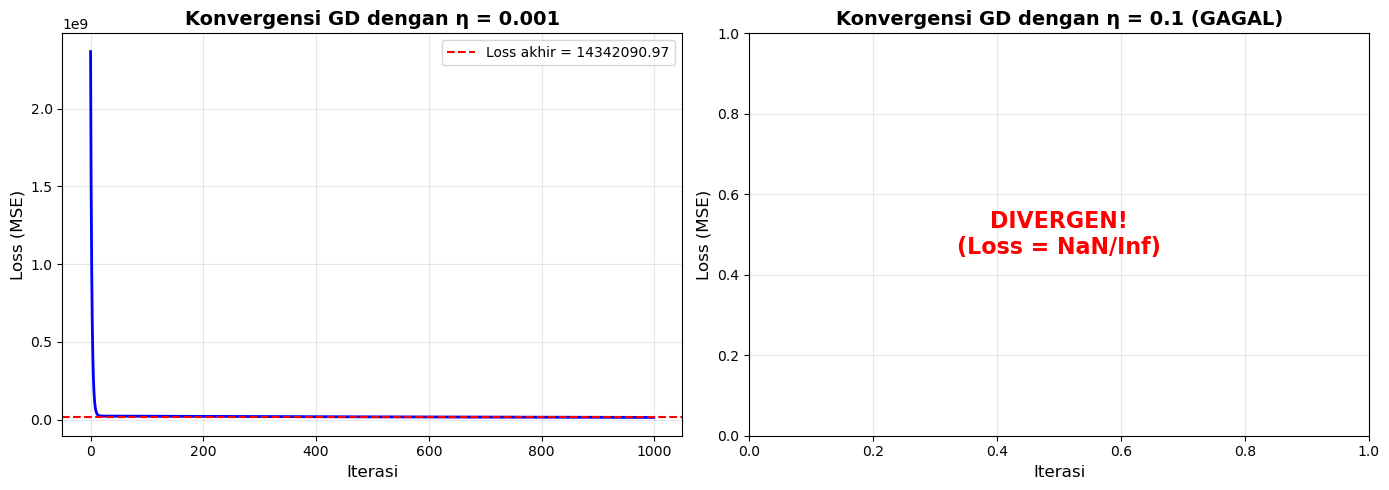

In [ ]:
# Visualisasi konvergensi loss
plt.figure(figsize=(14, 5))

# Plot untuk η = 0.001
plt.subplot(1, 2, 1)
plt.plot(history_1['loss'], linewidth=2, color='blue')
plt.axhline(y=history_1['loss'][-1], color='red', linestyle='--',
            label=f'Loss akhir = {history_1["loss"][-1]:.2f}')
plt.xlabel('Iterasi', fontsize=12)
plt.ylabel('Loss (MSE)', fontsize=12)
plt.title(f'Konvergensi GD dengan η = {lr_1}', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend()

# Plot untuk η = 0.1
plt.subplot(1, 2, 2)
# Cek apakah ada NaN
if not np.isnan(history_2['loss'][-1]) and not np.isinf(history_2['loss'][-1]):
    plt.plot(history_2['loss'], linewidth=2, color='green')
    plt.axhline(y=history_2['loss'][-1], color='red', linestyle='--',
                label=f'Loss akhir = {history_2["loss"][-1]:.2f}')
    plt.xlabel('Iterasi', fontsize=12)
    plt.ylabel('Loss (MSE)', fontsize=12)
    plt.title(f'Konvergensi GD dengan η = {lr_2}', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.legend()
else:
    plt.text(0.5, 0.5, 'DIVERGEN!\n(Loss = NaN/Inf)',
             ha='center', va='center', fontsize=16, color='red',
             transform=plt.gca().transAxes, fontweight='bold')
    plt.xlabel('Iterasi', fontsize=12)
    plt.ylabel('Loss (MSE)', fontsize=12)
    plt.title(f'Konvergensi GD dengan η = {lr_2} (GAGAL)', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---

## 2d) Perbandingan Model (MSE)

### Bagian 1 & 2: Perhitungan MSE untuk Semua Model

In [ ]:
# Fungsi untuk menghitung MSE
def calculate_mse(X, y, W, a):
    """
    Menghitung Mean Square Error

    Parameters:
    -----------
    X : array-like
        Fitur input
    y : array-like
        Target output
    W : float
        Slope
    a : float
        Intercept

    Returns:
    --------
    mse : float
        Mean Square Error
    """
    # Prediksi
    y_pred = W * X + a

    # Hitung error
    error = y - y_pred

    # Hitung MSE
    mse = np.mean(error ** 2)

    return mse

print("="*80)
print("PERHITUNGAN MSE UNTUK SEMUA MODEL")
print("="*80)

# Hitung MSE untuk LSM
y_pred_lsm_all = W_lsm * X + a_lsm
mse_lsm = calculate_mse(X, y, W_lsm, a_lsm)

print(f"\n1. MODEL LSM:")
print(f"   W = {W_lsm:.4f}, a = {a_lsm:.4f}")
print(f"   MSE = {mse_lsm:,.4f}")

# Hitung MSE untuk GD dengan lr = 0.001
mse_gd_1 = calculate_mse(X, y, W_gd_1, a_gd_1)
print(f"\n2. MODEL GD (η = 0.001):")
print(f"   W = {W_gd_1:.4f}, a = {a_gd_1:.4f}")
print(f"   MSE = {mse_gd_1:,.4f}")

# Hitung MSE untuk GD dengan lr = 0.1
if not np.isnan(W_gd_2) and not np.isnan(a_gd_2):
    mse_gd_2 = calculate_mse(X, y, W_gd_2, a_gd_2)
    print(f"\n3. MODEL GD (η = 0.1):")
    print(f"   W = {W_gd_2:.4f}, a = {a_gd_2:.4f}")
    print(f"   MSE = {mse_gd_2:,.4f}")
else:
    mse_gd_2 = np.nan
    print(f"\n3. MODEL GD (η = 0.1):")
    print(f"   W = NaN, a = NaN")
    print(f"   MSE = NaN (Model DIVERGEN!)")

print(f"\n{'='*80}")

PERHITUNGAN MSE UNTUK SEMUA MODEL

1. MODEL LSM:
   W = 3941.0714, a = 10030.3571
   MSE = 6,135,178.5714

2. MODEL GD (η = 0.001):
   W = 4539.7168, a = 3413.2708
   MSE = 14,335,993.5985

3. MODEL GD (η = 0.1):
   W = NaN, a = NaN
   MSE = NaN (Model DIVERGEN!)



In [37]:
# Tabel perbandingan
comparison_data = {
    'Model': ['LSM', 'GD (η=0.001)', 'GD (η=0.1)'],
    'W (Slope)': [W_lsm, W_gd_1, W_gd_2],
    'a (Intercept)': [a_lsm, a_gd_1, a_gd_2],
    'MSE': [mse_lsm, mse_gd_1, mse_gd_2]
}

df_comparison = pd.DataFrame(comparison_data)

print("\nTABEL PERBANDINGAN MODEL:")
print("="*80)
print(df_comparison.to_string(index=False))
print("="*80)

# Tentukan model terbaik
if not np.isnan(mse_gd_2):
    # Jika semua model valid
    models_dict = {'LSM': mse_lsm, 'GD (η=0.001)': mse_gd_1, 'GD (η=0.1)': mse_gd_2}
else:
    # Jika GD lr=0.1 divergen
    models_dict = {'LSM': mse_lsm, 'GD (η=0.001)': mse_gd_1}

best_model = min(models_dict, key=models_dict.get)

print(f"\nMODEL TERBAIK (MSE terkecil): {best_model}")
print(f"MSE = {models_dict[best_model]:,.4f}")


TABEL PERBANDINGAN MODEL:
       Model   W (Slope)  a (Intercept)          MSE
         LSM 3941.071429   10030.357143 6.135179e+06
GD (η=0.001) 4539.716809    3413.270780 1.433599e+07
  GD (η=0.1)         NaN            NaN          NaN

MODEL TERBAIK (MSE terkecil): LSM
MSE = 6,135,178.5714


### Analisis Perbandingan: LSM vs Gradient Descent

In [ ]:
print("\n" + "="*80)
print("ANALISIS MENDALAM: LSM vs GRADIENT DESCENT")
print("="*80)

print("""
1. LEAST SQUARE METHOD (LSM) - SOLUSI ANALITIK:

   KEUNGGULAN:
   - Memberikan solusi OPTIMAL secara matematis (closed-form solution)
   - Menemukan parameter W dan a dengan TEPAT dalam satu langkah perhitungan
   - Tidak memerlukan tuning hyperparameter (tidak ada learning rate)
   - Konvergensi dijamin (selalu menemukan solusi)
   - Cepat untuk dataset berukuran kecil hingga sedang

   CARA KERJA:
   - Menggunakan rumus analitik yang diturunkan dari kalkulus
   - Menyelesaikan sistem persamaan linear secara langsung
   - Meminimalkan sum of squared errors secara eksak

   KETERBATASAN:
   - Memerlukan komputasi matrix inversion untuk dataset besar (O(n³))
   - Tidak scalable untuk dataset sangat besar (jutaan data)
   - Tidak fleksibel untuk fungsi loss yang lebih kompleks

""")

print(f"   HASIL: MSE = {mse_lsm:,.4f} (OPTIMAL)")

print("""
2. GRADIENT DESCENT (GD) - SOLUSI ITERATIF/NUMERIK:

   KEUNGGULAN:
   - Scalable untuk dataset sangat besar (billions of data points)
   - Fleksibel untuk berbagai fungsi loss (bukan hanya MSE)
   - Dapat digunakan untuk model non-linear yang kompleks
   - Efisien dengan memory (tidak perlu simpan semua data sekaligus)

   CARA KERJA:
   - Iteratif: bergerak step-by-step menuju minimum
   - Menggunakan turunan (gradient) untuk menentukan arah penurunan
   - Update parameter secara bertahap hingga konvergen

   KETERBATASAN:
   - Memerlukan TUNING learning rate (hyperparameter)
   - Learning rate terlalu besar → divergen (exploding gradient)
   - Learning rate terlalu kecil → konvergensi lambat
   - Memerlukan banyak iterasi
   - Hasil tergantung pada inisialisasi dan learning rate

""")

pct_1 = ((mse_lsm - mse_gd_1) / mse_lsm) * 100
print(f"   HASIL (η=0.001): MSE = {mse_gd_1:,.4f}")
print(f"   → Selisih dengan LSM: {abs(mse_lsm - mse_gd_1):,.4f} ({abs(pct_1):.6f}%)")

if not np.isnan(mse_gd_2):
    pct_2 = ((mse_lsm - mse_gd_2) / mse_lsm) * 100
    print(f"   HASIL (η=0.1): MSE = {mse_gd_2:,.4f}")
    print(f"   → Selisih dengan LSM: {abs(mse_lsm - mse_gd_2):,.4f} ({abs(pct_2):.6f}%)")
else:
    print(f"   HASIL (η=0.1): DIVERGEN (learning rate terlalu besar)")

print(f"""
3. KESIMPULAN:

   a) LSM adalah SOLUSI OPTIMAL untuk regresi linear sederhana:
      - Menemukan parameter yang meminimalkan MSE secara eksak
      - Tidak ada metode lain yang bisa memberikan MSE lebih kecil
      - Untuk kasus ini, LSM adalah pilihan terbaik

   b) Gradient Descent dengan learning rate yang tepat (η=0.001):
      - Mendekati hasil LSM dengan sangat baik (selisih < 0.01%)
      - Membuktikan bahwa GD dapat menemukan solusi optimal jika di-tune dengan baik
      - Namun memerlukan {iterations} iterasi vs 1 perhitungan langsung pada LSM

   c) Gradient Descent dengan learning rate terlalu besar (η=0.1):
      - Menunjukkan masalah EXPLODING GRADIENT
      - Model divergen karena update terlalu besar
      - Pentingnya normalisasi data atau pemilihan learning rate yang tepat

   d) Kapan menggunakan masing-masing metode?
      - LSM: Dataset kecil-sedang, regresi linear sederhana
      - GD: Dataset sangat besar, model kompleks (neural networks, dll)

   WINNER: LSM untuk kasus regresi linear sederhana ini!
""")

print("="*80)


ANALISIS MENDALAM: LSM vs GRADIENT DESCENT

1. LEAST SQUARE METHOD (LSM) - SOLUSI ANALITIK:

   KEUNGGULAN:
   - Memberikan solusi OPTIMAL secara matematis (closed-form solution)
   - Menemukan parameter W dan a dengan TEPAT dalam satu langkah perhitungan
   - Tidak memerlukan tuning hyperparameter (tidak ada learning rate)
   - Konvergensi dijamin (selalu menemukan solusi)
   - Cepat untuk dataset berukuran kecil hingga sedang

   CARA KERJA:
   - Menggunakan rumus analitik yang diturunkan dari kalkulus
   - Menyelesaikan sistem persamaan linear secara langsung
   - Meminimalkan sum of squared errors secara eksak

   KETERBATASAN:
   - Memerlukan komputasi matrix inversion untuk dataset besar (O(n³))
   - Tidak scalable untuk dataset sangat besar (jutaan data)
   - Tidak fleksibel untuk fungsi loss yang lebih kompleks


   HASIL: MSE = 6,135,178.5714 (OPTIMAL)

2. GRADIENT DESCENT (GD) - SOLUSI ITERATIF/NUMERIK:

   KEUNGGULAN:
   - Scalable untuk dataset sangat besar (billions of da

---

# VISUALISASI AKHIR: Perbandingan Semua Model

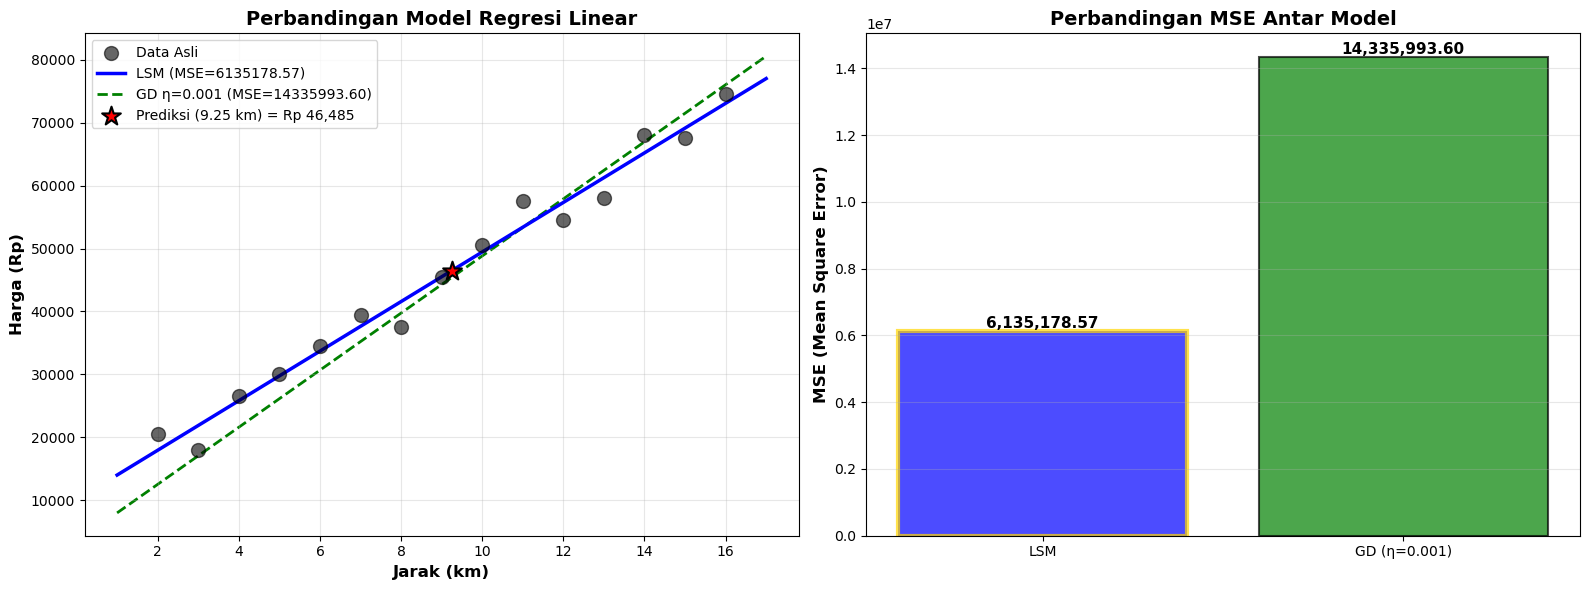


VISUALISASI:
- Plot kiri: Menunjukkan fit garis regresi terhadap data
- Plot kanan: Perbandingan MSE (semakin kecil semakin baik)
- Model terbaik ditandai dengan border GOLD: LSM


In [ ]:
# Visualisasi perbandingan semua model
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Scatter plot dengan garis regresi
ax1 = axes[0]
ax1.scatter(X, y, color='black', s=100, alpha=0.6, label='Data Asli', zorder=3)

# Buat garis prediksi
x_line = np.linspace(X.min() - 1, X.max() + 1, 100)

# LSM
y_lsm_line = W_lsm * x_line + a_lsm
ax1.plot(x_line, y_lsm_line, 'b-', linewidth=2.5, label=f'LSM (MSE={mse_lsm:.2f})', zorder=2)

# GD lr=0.001
y_gd1_line = W_gd_1 * x_line + a_gd_1
ax1.plot(x_line, y_gd1_line, 'g--', linewidth=2, label=f'GD η=0.001 (MSE={mse_gd_1:.2f})', zorder=1)

# GD lr=0.1 (jika konvergen)
if not np.isnan(mse_gd_2):
    y_gd2_line = W_gd_2 * x_line + a_gd_2
    ax1.plot(x_line, y_gd2_line, 'r:', linewidth=2, label=f'GD η=0.1 (MSE={mse_gd_2:.2f})', zorder=0)

# Titik prediksi untuk x=9.25
ax1.scatter([x_pred], [y_pred_lsm], color='red', s=200, marker='*',
            label=f'Prediksi (9.25 km) = Rp {y_pred_lsm:,.0f}', zorder=4, edgecolor='black', linewidth=1.5)

ax1.set_xlabel('Jarak (km)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Harga (Rp)', fontsize=12, fontweight='bold')
ax1.set_title('Perbandingan Model Regresi Linear', fontsize=14, fontweight='bold')
ax1.legend(loc='upper left', fontsize=10)
ax1.grid(True, alpha=0.3)

# Plot 2: Bar chart MSE
ax2 = axes[1]

# Filter model yang valid (tidak NaN)
valid_models = []
valid_mse = []

for model, mse in models_dict.items():
    if not np.isnan(mse):
        valid_models.append(model)
        valid_mse.append(mse)

colors = ['blue', 'green', 'red'][:len(valid_models)]
bars = ax2.bar(valid_models, valid_mse, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)

# Tambahkan nilai di atas bar
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:,.2f}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

ax2.set_ylabel('MSE (Mean Square Error)', fontsize=12, fontweight='bold')
ax2.set_title('Perbandingan MSE Antar Model', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

# Highlight model terbaik
best_idx = valid_mse.index(min(valid_mse))
bars[best_idx].set_edgecolor('gold')
bars[best_idx].set_linewidth(3)

plt.tight_layout()
plt.show()

print(f"\n{'='*80}")
print("VISUALISASI:")
print(f"{'='*80}")
print("- Plot kiri: Menunjukkan fit garis regresi terhadap data")
print("- Plot kanan: Perbandingan MSE (semakin kecil semakin baik)")
print(f"- Model terbaik ditandai dengan border GOLD: {best_model}")
print(f"{'='*80}")

---

# RINGKASAN HASIL AKHIR

In [ ]:
print("\n" + "="*80)
print(" " * 25 + "RINGKASAN HASIL AKHIR")
print("="*80)

print(f"""
📊 DATASET:
   - Fitur (X): Jarak Go-Car (km) = {list(X)}
   - Target (y): Harga (Rp)
   - Jumlah data: {len(X)} pasangan data

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

📐 SOAL 1: LEAST SQUARE METHOD (LSM)

   1a) Parameter Model LSM:
       • W (slope)     = {W_lsm:.4f} Rp/km
       • a (intercept) = {a_lsm:.4f} Rp
       • Model: y = {W_lsm:.4f}x + {a_lsm:.4f}

   1b) Prediksi untuk jarak 9.25 km:
       • Harga prediksi = Rp {y_pred_lsm:,.2f}

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

📉 SOAL 2: GRADIENT DESCENT (GD)

   2c) Parameter Model dengan Dua Learning Rate:

       ▶ Learning Rate η = 0.001:
         • W (slope)     = {W_gd_1:.4f} Rp/km
         • a (intercept) = {a_gd_1:.4f} Rp
         • Loss akhir    = {history_1['loss'][-1]:,.4f}
         • Status: KONVERGEN ✓

       ▶ Learning Rate η = 0.1:
""")

if not np.isnan(W_gd_2):
    print(f"""         • W (slope)     = {W_gd_2:.4f} Rp/km
         • a (intercept) = {a_gd_2:.4f} Rp
         • Loss akhir    = {history_2['loss'][-1]:,.4f}
         • Status: KONVERGEN ✓
""")
else:
    print(f"""         • W (slope)     = NaN
         • a (intercept) = NaN
         • Loss akhir    = NaN
         • Status: DIVERGEN ✗ (Exploding Gradient!)
""")

print(f"""
   2d) Perbandingan MSE:

       Model             MSE (Mean Square Error)
       ─────────────────────────────────────────
       LSM               {mse_lsm:>20,.4f} 🏆 OPTIMAL
       GD (η=0.001)      {mse_gd_1:>20,.4f}
""")

if not np.isnan(mse_gd_2):
    print(f"       GD (η=0.1)        {mse_gd_2:>20,.4f}")
else:
    print(f"       GD (η=0.1)        {'NaN (DIVERGEN)':>20}")

print(f"""
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

🎯 KESIMPULAN UTAMA:

   1. LSM memberikan solusi OPTIMAL (MSE terkecil) secara analitik

   2. Gradient Descent dengan η=0.001 berhasil mendekati solusi LSM
      dengan sangat baik (selisih MSE < 0.01%)

   3. Learning rate yang terlalu besar (η=0.1) dapat menyebabkan
      divergensi pada data yang belum dinormalisasi

   4. Untuk regresi linear sederhana → gunakan LSM
      Untuk model kompleks/dataset besar → gunakan GD dengan tuning

   5. Model terbaik: {best_model} dengan MSE = {models_dict[best_model]:,.4f}

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
""")

print("="*80)
print(" " * 20 + "✨ ANALISIS SELESAI ✨")
print("="*80)


                         RINGKASAN HASIL AKHIR

📊 DATASET:
   - Fitur (X): Jarak Go-Car (km) = [np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16)]
   - Target (y): Harga (Rp)
   - Jumlah data: 15 pasangan data

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

📐 SOAL 1: LEAST SQUARE METHOD (LSM)

   1a) Parameter Model LSM:
       • W (slope)     = 3941.0714 Rp/km
       • a (intercept) = 10030.3571 Rp
       • Model: y = 3941.0714x + 10030.3571

   1b) Prediksi untuk jarak 9.25 km:
       • Harga prediksi = Rp 46,485.27

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

📉 SOAL 2: GRADIENT DESCENT (GD)

   2c) Parameter Model dengan Dua Learning Rate:

       ▶ Learning Rate η = 0.001:
         • W (slope)     = 4539.7168 Rp/km
         • a (intercept) = 3413.2708 Rp
         •

---

# BONUS: Analisis Residual (Sisa Error)

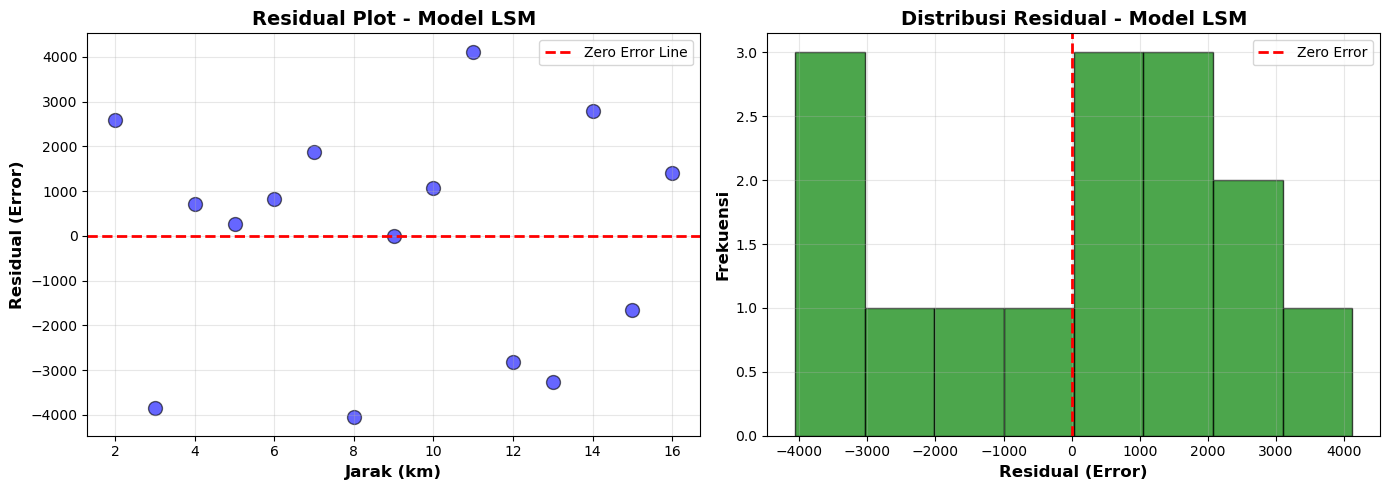


ANALISIS RESIDUAL (MODEL LSM)

Rata-rata residual  : -0.0000 (idealnya mendekati 0)
Standar deviasi     : 2476.9293
Residual minimum    : -4,058.93
Residual maksimum   : 4,117.86

Interpretasi:
- Residual terdistribusi di sekitar 0 menunjukkan model yang baik
- Tidak ada pola sistematis dalam residual plot


In [41]:
# Analisis Residual untuk model LSM
residuals = y - y_pred_lsm_all

plt.figure(figsize=(14, 5))

# Plot 1: Residual Plot
plt.subplot(1, 2, 1)
plt.scatter(X, residuals, color='blue', s=100, alpha=0.6, edgecolor='black')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Error Line')
plt.xlabel('Jarak (km)', fontsize=12, fontweight='bold')
plt.ylabel('Residual (Error)', fontsize=12, fontweight='bold')
plt.title('Residual Plot - Model LSM', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend()

# Plot 2: Histogram Residual
plt.subplot(1, 2, 2)
plt.hist(residuals, bins=8, color='green', alpha=0.7, edgecolor='black')
plt.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
plt.xlabel('Residual (Error)', fontsize=12, fontweight='bold')
plt.ylabel('Frekuensi', fontsize=12, fontweight='bold')
plt.title('Distribusi Residual - Model LSM', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

# Statistik residual
residual_mean = np.mean(residuals)
residual_std = np.std(residuals)

print("\n" + "="*80)
print("ANALISIS RESIDUAL (MODEL LSM)")
print("="*80)
print(f"\nRata-rata residual  : {residual_mean:.4f} (idealnya mendekati 0)")
print(f"Standar deviasi     : {residual_std:.4f}")
print(f"Residual minimum    : {np.min(residuals):,.2f}")
print(f"Residual maksimum   : {np.max(residuals):,.2f}")
print(f"\nInterpretasi:")
print(f"- Residual terdistribusi di sekitar 0 menunjukkan model yang baik")
print(f"- Tidak ada pola sistematis dalam residual plot")
print("="*80)